<a href="https://colab.research.google.com/github/Ninkrn/bsc_dpdm22/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [3]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')
     

Mounted at /content/gdrive


In [4]:
import os
os.chdir('/content/gdrive/MyDrive/BPDM/Project')

In [5]:
data_test = pd.read_csv('/content/gdrive/MyDrive/BPDM/Project/Test.csv')
print(data_test.shape) # shown nomber of (row, column)
data_test.head(3)

(2627, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A


In [6]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [7]:
print(len(data_test[data_test['Graduated'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Graduated'])

24


In [8]:
print(len(data_test[data_test['Profession'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Profession'])

37


In [9]:
print(len(data_test[data_test['Ever_Married'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Ever_Married'])

47


In [10]:
print(len(data_test[data_test['Work_Experience'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Work_Experience'])

253


In [11]:
print(len(data_test[data_test['Family_Size'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Family_Size'])

88


In [12]:
#fill NA with Text 
data_test['Graduated'] = data_test['Graduated'].fillna('Unknown') #จบการศึกษาfillnaว่าunknown 
data_test['Profession'] = data_test['Profession'].fillna('Unknown') #อาชีพ

In [13]:
# fill NA with 0,1
data_test[['Work_Experience']]  = data_test[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_test[['Family_Size']]  = data_test[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [14]:
del data_test['Var_1']

In [15]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

In [16]:
data_train = pd.read_csv('/content/gdrive/MyDrive/BPDM/Project/Train.csv')
print(data_train.shape) # shown nomber of (row, column)
data_train.head(3)

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [17]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [18]:
print(len(data_train[data_train['Ever_Married'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Ever_Married'])

140


In [19]:
print(len(data_train[data_train['Graduated'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Graduated'])

74


In [20]:
print(len(data_train[data_train['Profession'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Profession'])

113


In [21]:
print(len(data_train[data_train['Work_Experience'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Work_Experience'])

772


In [22]:
print(len(data_train[data_train['Family_Size'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Family_Size'])

251


In [23]:
del data_train['Var_1']

In [24]:
#fill NA with Text 
data_train['Graduated'] = data_train['Graduated'].fillna('Unknown')  #จบการศึกษาfillnaว่าunknown 
data_train['Ever_Married'] = data_train['Ever_Married'].fillna('Unknown') #สถานภาพการสมรส
data_train['Profession'] = data_train['Profession'].fillna('Unknown') #อาชีพ
# fill NA with 0,1
data_train[['Work_Experience']]  = data_train[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_train[['Family_Size']]  = data_train[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [25]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

In [28]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = data_test

# Preprocess the data
X = data_test.drop('Segmentation', axis=1)
y = data_test['Segmentation']
X = pd.get_dummies(X)

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the k-NN classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Evaluate the performance of the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Preprocess the new customer data
new_customer = pd.DataFrame({'ID': ['C10001'], 'Gender': ['Male'], 'Ever_Married': ['Yes'], 'Age': [25], 'Graduated': ['Yes'], 'Profession': ['Engineer'], 'Work_Experience': [2], 'Spending_Score': ['Low'], 'Family_Size': [4]})
new_customer = pd.get_dummies(new_customer)
new_customer = new_customer.reindex(columns=X_train.columns, fill_value=0)

# Predict the right group of new customers
prediction = clf.predict(new_customer)
print('Predicted Segment:', prediction)


# Predict the right group of new customers
#new_customer = pd.DataFrame({'ID': ['C10001'], 'Gender': ['Male'], 'Ever_Married': ['Yes'], 'Age': [25], 'Graduated': ['Yes'], 'Profession': ['Engineer'], 'Work_Experience': [2], 'Spending_Score': ['Low'], 'Family_Size': [4]})
#new_customer = pd.get_dummies(new_customer)
#prediction = clf.predict(new_customer)
#print('Predicted Segment:', prediction)

Accuracy: 0.2775229357798165
Precision: 0.26720104185874977
Recall: 0.26141702283302964
F1 Score: 0.2566558681857339
Predicted Segment: ['B']


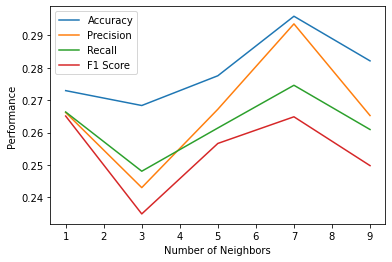

In [31]:
import matplotlib.pyplot as plt


# Train k-NN classifiers with different numbers of neighbors
num_neighbors = [1, 3, 5, 7, 9]
accuracy = []
precision = []
recall = []
f1 = []

for n in num_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='macro'))
    recall.append(recall_score(y_test, y_pred, average='macro'))
    f1.append(f1_score(y_test, y_pred, average='macro'))

# Plot the performance metrics as a function of the number of neighbors
plt.plot(num_neighbors, accuracy, label='Accuracy')
plt.plot(num_neighbors, precision, label='Precision')
plt.plot(num_neighbors, recall, label='Recall')
plt.plot(num_neighbors, f1, label='F1 Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Performance')
plt.legend()
plt.show()
#This code trains k-NN classifiers with different numbers of neighbors and evaluates their performance using the accuracy, precision, recall, and F1 score metrics. It then plots these metrics as a function of the number of neighbors. You can use this graph to determine the optimal number of neighbors for your classifier based on the desired trade-off between accuracy, precision, recall, and F1 score.

In [35]:
ind = 28
plt.gray()
plt.matshow(y_pred[ind])
print(y_pred[ind])

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:

clf.fit(x_train,y_train)
     
y_predict = clf.predict(x_test)
print(classification_report(y_test,y_predict))